# GDP ANALYSIS WITH PYTHON

**INTRODUCTION**

Gross Domestic Product(GDP) is the final value of all the economic goods and services produced within the country's geographic boundaries during a specified period of time. GDP growth rate is the major indicator of a country's economic performance. GDP is a key tool that guuides investors, policymakers, and businesses in strategic decision making. Per capita GDP is a global indicator of a country's economy that economists use in combination with GDP to asses a country's wealth based on economic growth. 

        GDP per capita= Gross Domestic Product(GDP) / Population

**OBJECTIVE**

The primary gosl of this data science projrct is to investigate the dataset " Countries of the World" and to focus on the elements that are influencing a country''s GDP per capita.

**ANALYSIS AND RESULTS**

Import the required python libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error


**Data**

In [2]:
data= pd.read_csv('countries of the world.csv', decimal=',')
print('Number of missing data:')
print(data.isnull().sum())
data.describe(include='all')

Number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


**Data Preparation**

The missing data is filled in by using the median of the region to which a country belongs because geologically close countries are often similar in many aspects.

In [3]:
# Calculate the median values of GDP per capita, Literacy, and Agriculture for each region
data.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()
# Loop through each column in the DataFrame
for col in data.columns.values:
    if data[col].isnull().sum() ==0:
        continue # If there are no missing values, skip to the next column

    if col== 'CLimate':
        # For 'Climate', use the mode (most common value) for each region to fill missing values
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        # For other columns, use the median value for each region to fill missing values
        guess_values= data.groupby('Region')[col].median()
    for region in data['Region'].unique(): # Loop through each unique region in the DataFrame
         # Fill missing values in the current column for the current region with the guessed values
        data[col].loc[(data[col].isnull()) & (data['Region']== region)] = guess_values[region]

print(data.isnull().sum())

C:\Users\CASEY OTIENO\AppData\Local\Temp\ipykernel_3448\1974188766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull()) & (data['Region']== region)] = guess_values[region]
C:\Users\CASEY OTIENO\AppData\Local\Temp\ipykernel_3448\1974188766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull()) & (data['Region']== region)] = guess_values[region]
C:\Users\CASEY OTIENO\AppData\Local\Temp\ipykernel_3448\1974188766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


C:\Users\CASEY OTIENO\AppData\Local\Temp\ipykernel_3448\1974188766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull()) & (data['Region']== region)] = guess_values[region]
C:\Users\CASEY OTIENO\AppData\Local\Temp\ipykernel_3448\1974188766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull()) & (data['Region']== region)] = guess_values[region]
C:\Users\CASEY OTIENO\AppData\Local\Temp\ipykernel_3448\1974188766.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

**Data Exploration**

**Top countries with the highest GDP per capita**

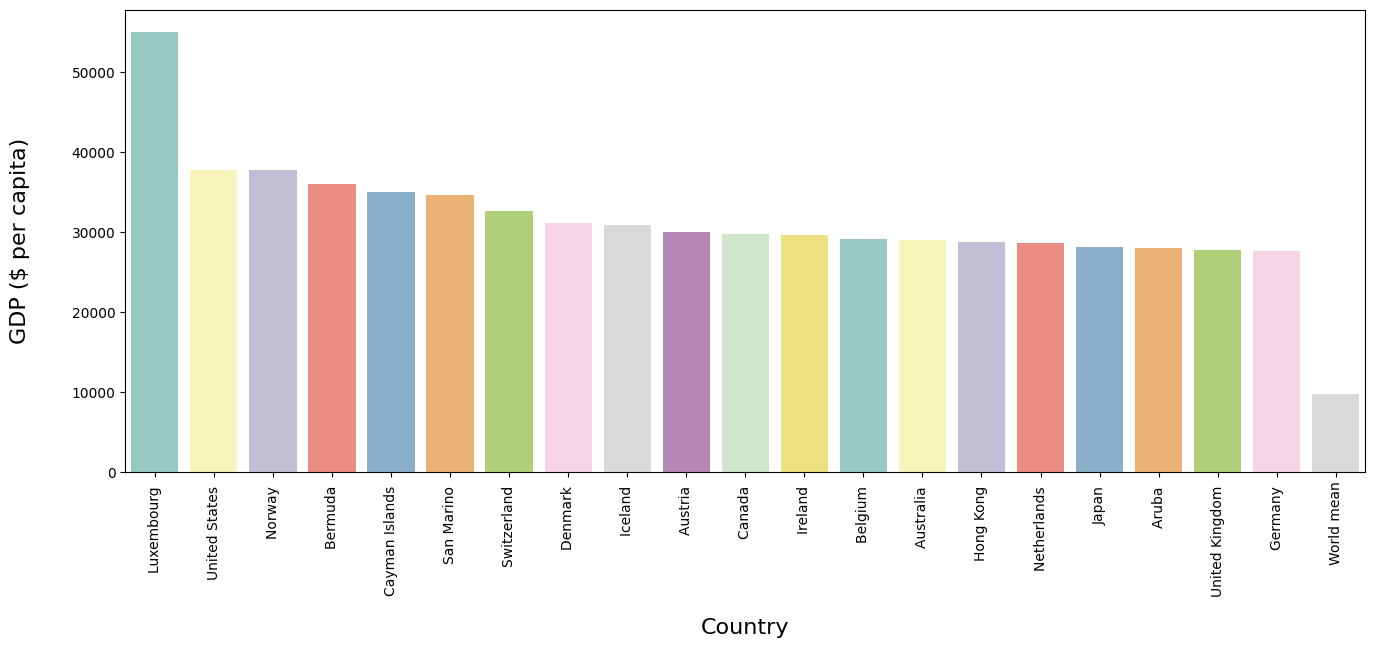

In [4]:
fig, ax = plt.subplots(figsize=(16, 6))# Create a figure and axis for the plot with a specific size
#ax=fig.add_subplot(111)
# Sort the data by GDP per capita in descending order and select the top 20 countries
top_gdp_countries= data.sort_values('GDP ($ per capita)', ascending=False).head(20)
# Calculate the mean GDP per capita for the world and create a DataFrame for it
mean= pd.DataFrame({'Country' : ['World mean'], 'GDP ($ per capita)' : [data['GDP ($ per capita)'].mean()]})
# Concatenate the top 20 countries DataFrame with the mean DataFrame
gdps= pd.concat([top_gdp_countries[['Country', 'GDP ($ per capita)']], mean],ignore_index=True)

# Create a bar plot using seaborn with countries on the x-axis and GDP per capita on the y-axis
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set3')

# Set the label padding for the x-axis and y-axis labels for better spacing
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)

ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()


**Correlation between Variables**

The heatmap below shows the correlation between the numerical columns.

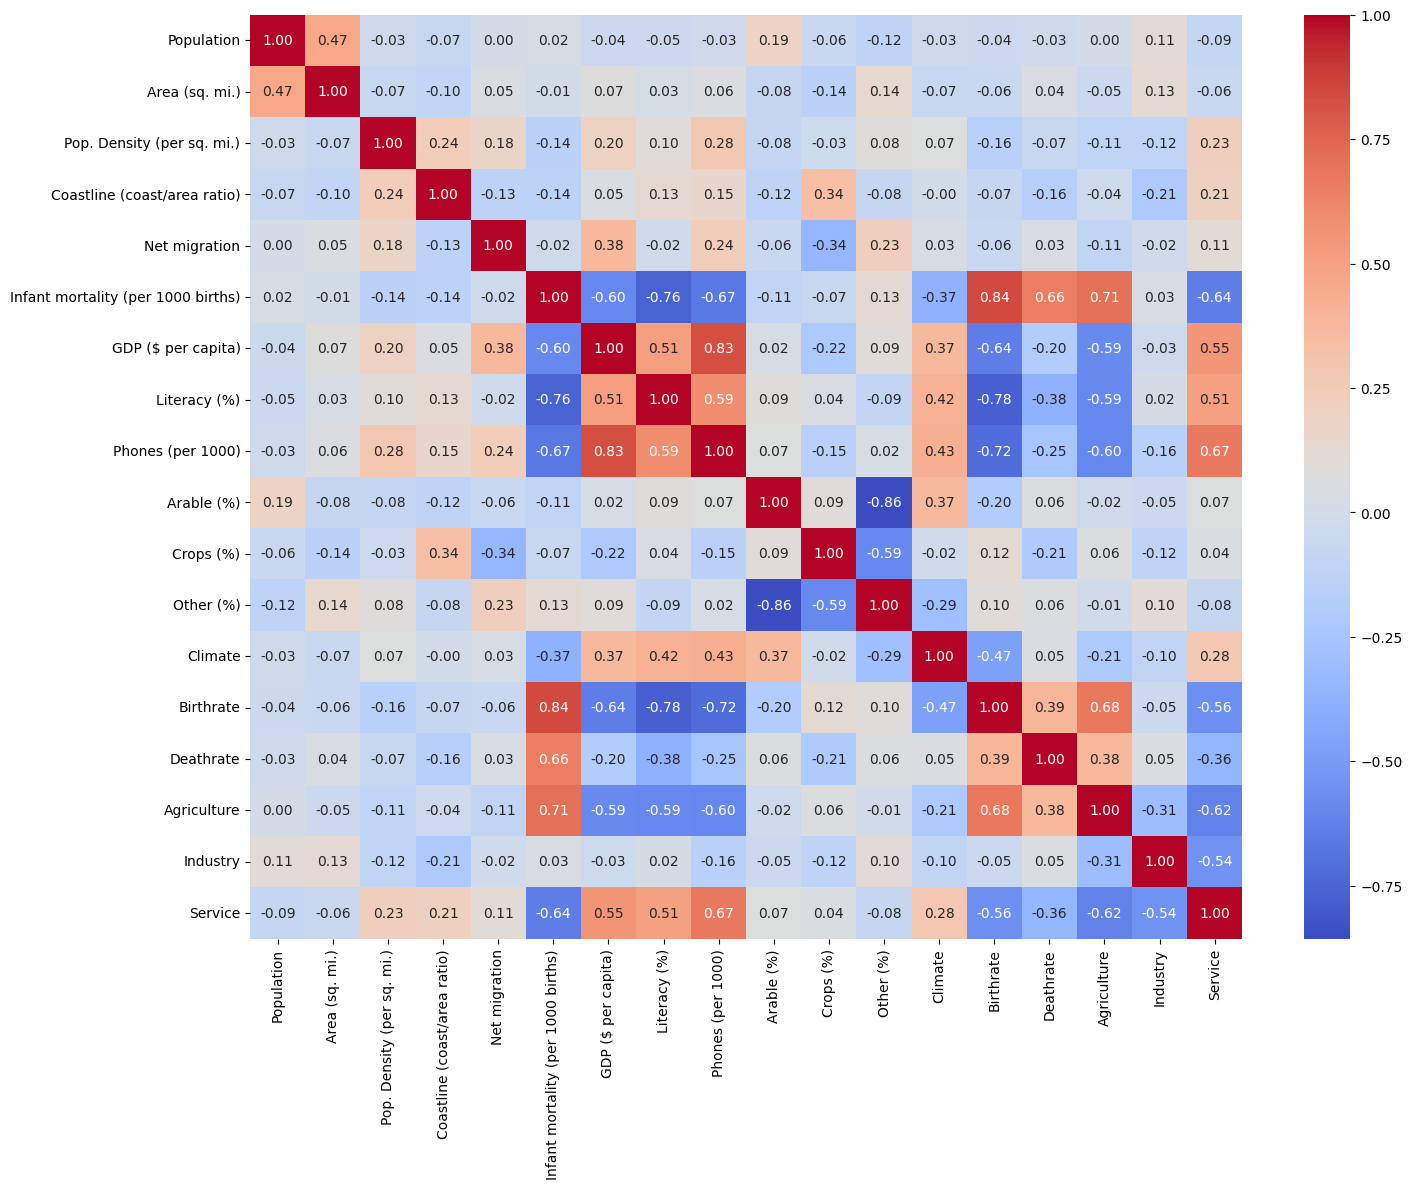

In [ ]:
corr_matrix=data.iloc[:,2:].corr() # correlation of numerical columns
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.show()

**Top Factors affecting GDP per capita**

The columns that are mostly correlated to GDP per capita with their scatter plots.

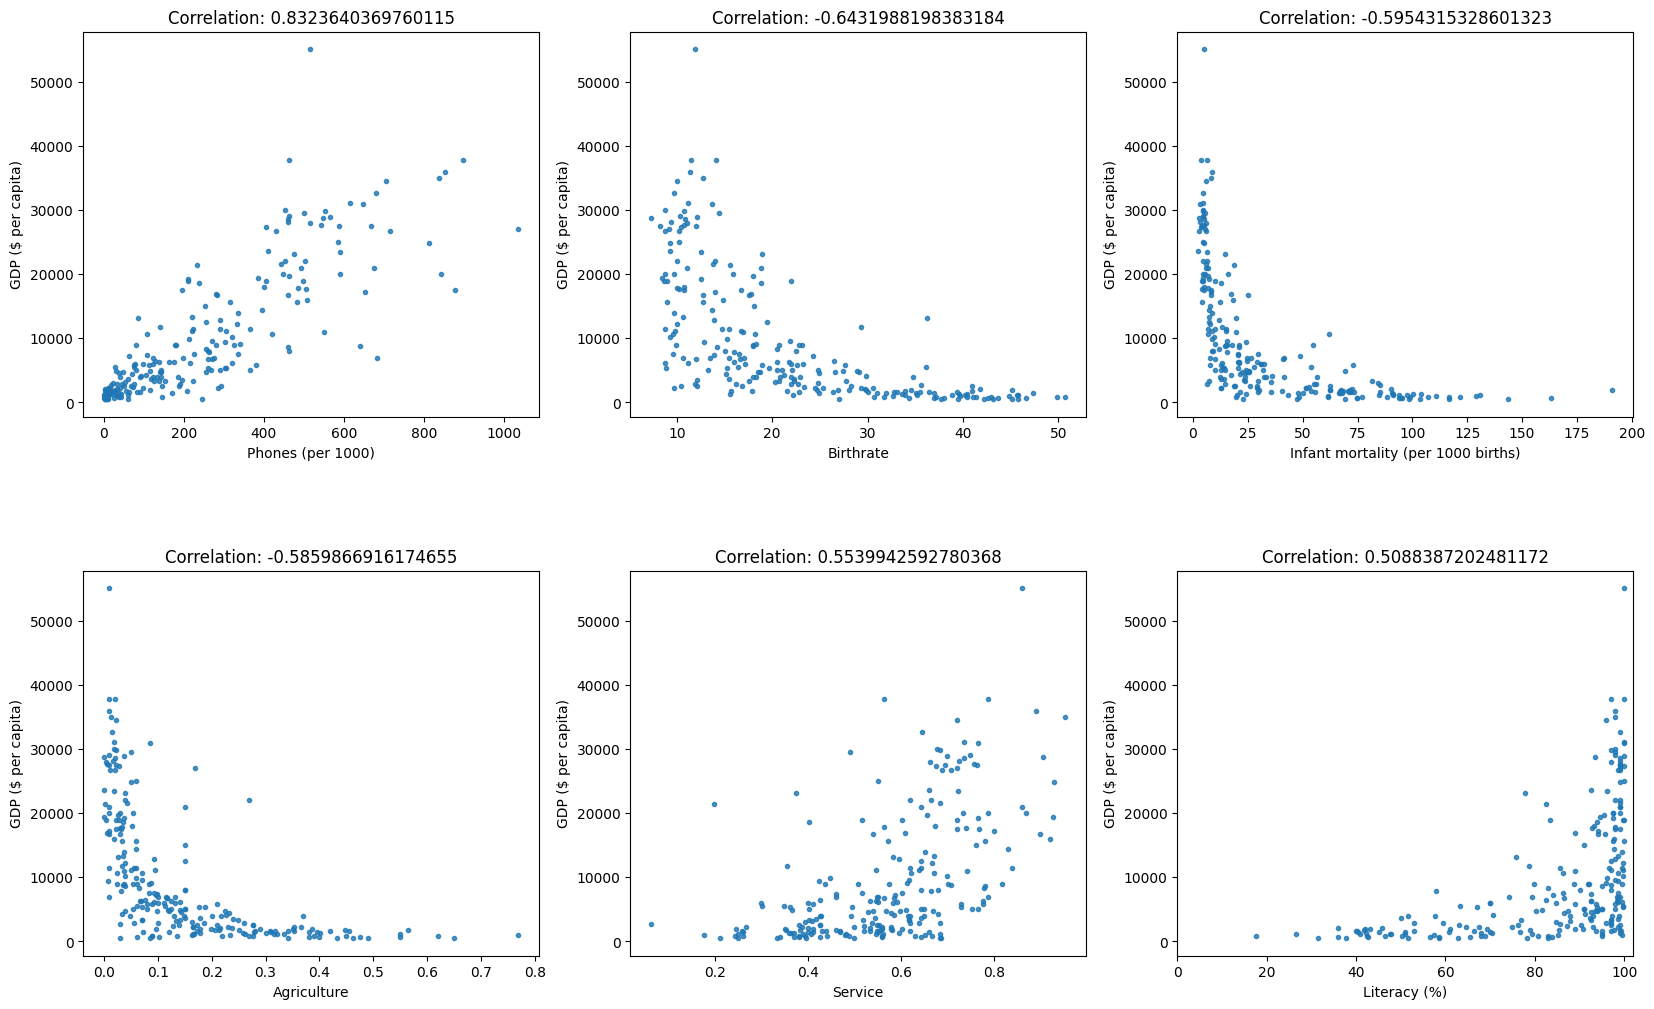

In [16]:
# Create a figure with 2 rows and 3 columns of subplots, and set the figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Adjust the space between the subplots
plt.subplots_adjust(hspace=0.4)

# Initialize a Series to hold the correlation values with GDP
corr_to_gdp = pd.Series(dtype='float64')

# Loop through the columns of the DataFrame, starting from the third column
for col in data.columns.values[2:]:
    # Check if the column is not 'GDP ($ per capita)' and 'Climate'
    if (col != 'GDP ($ per capita)') & (col != 'Climate'):
        # Calculate the correlation of the current column with GDP and store it in the Series
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])

# Get the absolute values of the correlations and sort them in descending order
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)

# Reorder the original correlation Series to match the sorted order
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

# Loop through the subplots to create scatter plots for the top correlations
for i in range(2):
    for j in range(3):
        # Calculate the index for accessing the correlation values
        index = i * 3 + j
        
        # Create a regression plot for the current correlation
        sns.regplot(x=corr_to_gdp.index.values[index], 
                    y='GDP ($ per capita)', 
                    data=data, 
                    ax=axes[i, j], 
                    fit_reg=False,  # No regression line
                    marker='.')  # Use dots as markers
        
        # Create a title for the subplot that includes the correlation value
        title = 'Correlation: ' + str(corr_to_gdp[corr_to_gdp.index.values[index]])
        
        # Set the title of the subplot
        axes[i, j].set_title(title)

# Set x-axis limits for the last subplot
axes[1, 2].set_xlim(0, 102)

# Display the plots
plt.show()

**Countries with low Birth-rate and low GDP per capita**

In [14]:
data.loc[(data['Birthrate'] < 14) & (data['GDP ($ per capita)']< 10000)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.00,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.00,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4.00,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.00,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.50,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.00,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.00,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3.00,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.00,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,2.75,9.95,14.65,0.054,0.371,0.575


**Modeling**

**Training and Testing**

In [ ]:
LE= LabelEncoder()# Initialize the LabelEncoder
data['Region_label'] = LE.fit_transform(data['Region'])# Transform the 'Region' column into numerical labels and store the result in a new column 'Region_label'
data['Climate_label'] = LE.fit_transform(data['Climate'])# Transform the 'Climate' column into numerical labels and store the result in a new column 'Climate_label'
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,5
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,5


In [20]:
# Split the data into training and testing sets
# test_size=0.3 means 30% of the data will be used for testing, and shuffle=True randomizes the data before splitting
train, test = train_test_split(data, test_size=0.3, shuffle=True)

# Define the features to be used for training the model
training_features = [
    'Population',                    # Total population of the country
    'Area (sq. mi.)',               # Total area of the country in square miles
    'Pop. Density (per sq. mi.)',   # Population density calculated per square mile
    'Coastline (coast/area ratio)',  # Ratio of coastline length to area of the country
    'Net migration',                 # Net migration rate
    'Infant mortality (per 1000 births)',  # Infant mortality rate per 1000 births
    'Literacy (%)',                  # Literacy rate as a percentage
    'Phones (per 1000)',             # Number of phones per 1000 people
    'Arable (%)',                    # Percentage of land that is arable
    'Crops (%)',                     # Percentage of land used for crops
    'Other (%)',                     # Percentage of land used for other purposes
    'Birthrate',                     # Birthrate per population
    'Deathrate',                     # Deathrate per population
    'Agriculture',                   # Contribution of agriculture to GDP
    'Industry',                      # Contribution of industry to GDP
    'Service',                       # Contribution of services to GDP
    'Region_label',                  # Encoded label for the region
    'Climate_label',                 # Encoded label for the climate
    'Service'                        # Contribution of services to GDP (duplicate, may need to be checked)
]

# Define the target variable which we want to predict
target = 'GDP ($ per capita)'

# Create training features and target variable for the training set
train_X = train[training_features]  # Features for training
train_Y = train[target]              # Target variable for training

# Create testing features and target variable for the testing set
test_X = test[training_features]     # Features for testing
test_Y = test[target]                 # Target variable for testing

First, the linear regression model is used. Both root mean squared erroe and mean squared log error were assessed, as for metric.

In [26]:
model=LinearRegression()# Initialize the Linear Regression model

model.fit(train_X,train_Y)# Fit the model to the training data (train_X as features and train_Y as the target variable)
train_pred_Y= model.predict(train_X)
test_pred_Y= model.predict(test_X)

# Clip the predicted values for training and testing to ensure they are non-negative
# This prevents negative predictions by setting any negative values to zero
train_pred_Y=pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y=pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index= test_Y.index)

rmse_train= np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train= mean_squared_log_error(train_pred_Y, train_Y)
rmse_test= np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test= mean_squared_log_error(test_pred_Y, test_Y)
# Print the RMSE and MSLE results for both training and testing datasets
print(f'rmse_train: {rmse_train}, msle_train: {msle_train}')
print(f'rmse_test: {rmse_test}, msle_test: {msle_test}')

rmse_train: 3893.2760843203982, msle_train: 5.944741537394193
rmse_test: 6609.825278259718, msle_test: 2.5232166343850597


Now let's build a nonlinear model: Random forest model

In [27]:
model=RandomForestRegressor(n_estimators=50,
                            max_depth=6,
                            min_weight_fraction_leaf= 0.05,
                            max_features= 0.8,
                            random_state= 42)# Initialize the Random Forest model

model.fit(train_X,train_Y)# Fit the model to the training data (train_X as features and train_Y as the target variable)
train_pred_Y= model.predict(train_X)
test_pred_Y= model.predict(test_X)

# Clip the predicted values for training and testing to ensure they are non-negative
# This prevents negative predictions by setting any negative values to zero
train_pred_Y=pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y=pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index= test_Y.index)

rmse_train= np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train= mean_squared_log_error(train_pred_Y, train_Y)
rmse_test= np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test= mean_squared_log_error(test_pred_Y, test_Y)
# Print the RMSE and MSLE results for both training and testing datasets
print(f'rmse_train: {rmse_train}, msle_train: {msle_train}')
print(f'rmse_test: {rmse_test}, msle_test: {msle_test}')

rmse_train: 2515.5145321420227, msle_train: 0.15670644597027514
rmse_test: 5521.674117756405, msle_test: 0.3240837853983332


**Visualization of Results**

A scatter plot of prediction against ground truth is generated. The model gives a reasonable prediction as the data points gather around the line y=x.

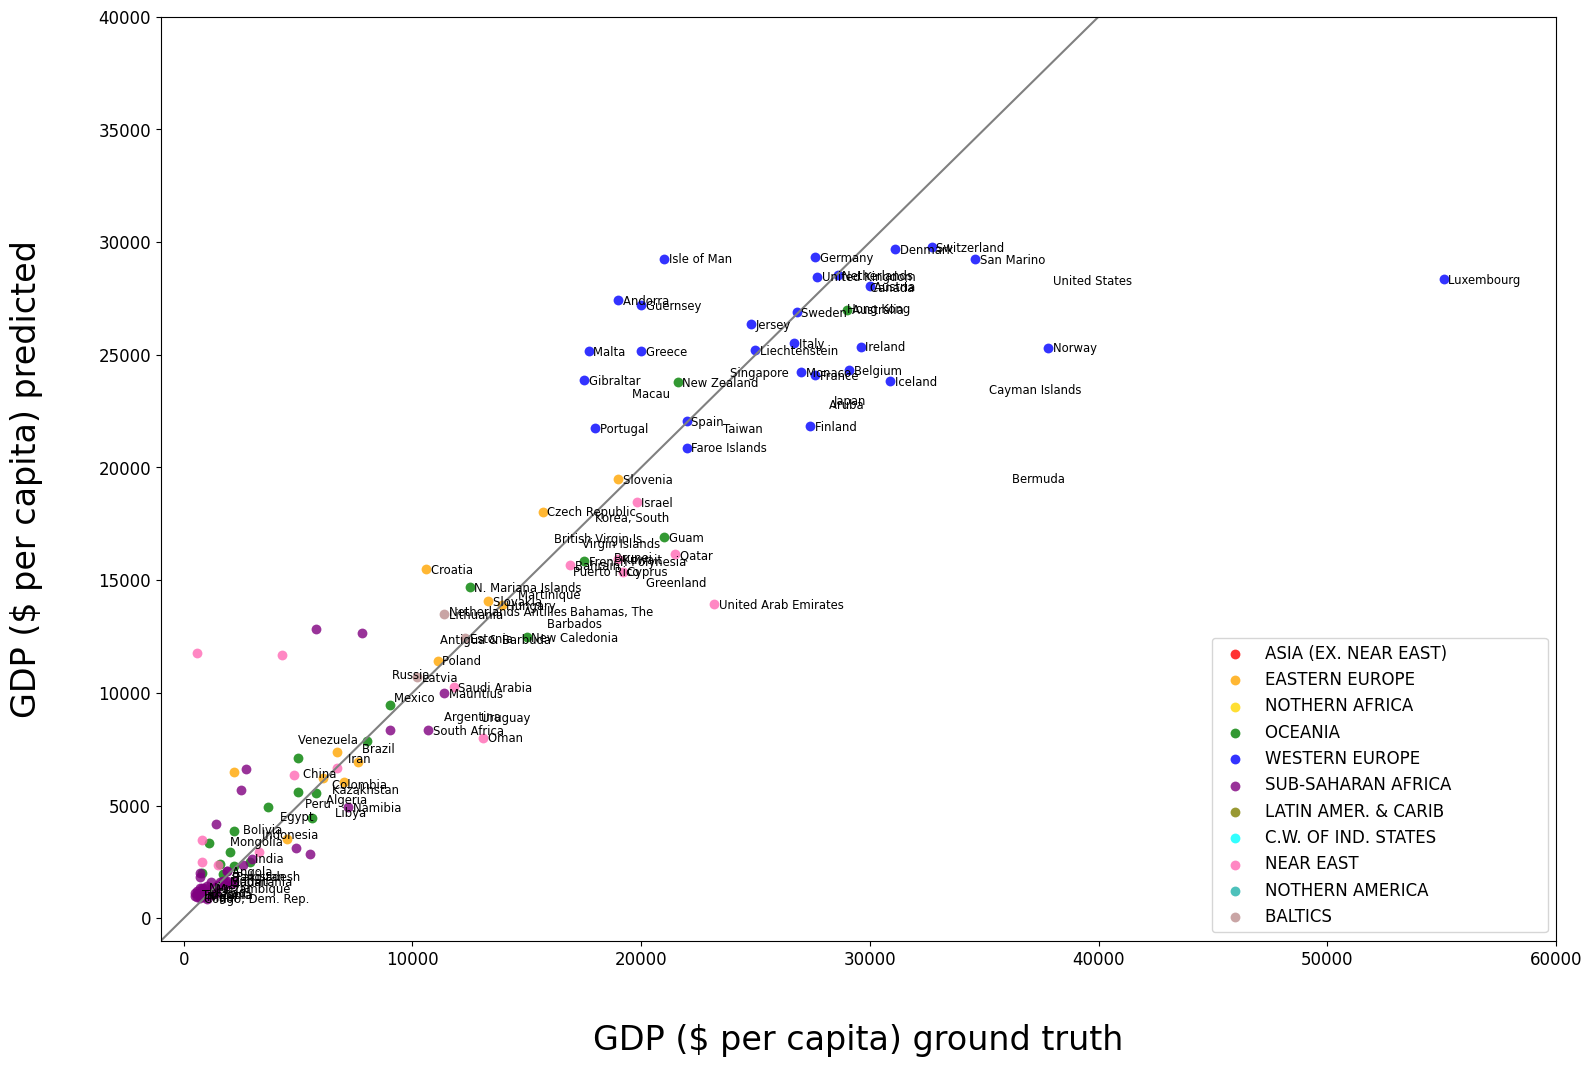

In [ ]:
plt.figure(figsize=(18,12))

train_test_Y= pd.concat([train_Y, test_Y])# Concatenate the true GDP values from training and testing sets into a single Series
train_test_pred_Y= pd.concat([train_pred_Y, test_pred_Y])# Concatenate the predicted GDP values from training and testing sets into a single Series

data_shuffled=data.loc[train_test_Y.index]# Shuffle the original data to match the indices of the combined true GDP values
label= data_shuffled['Country']# Extract the country labels for later use in annotations

colors={'ASIA (EX. NEAR EAST)               ': 'red',
        'EASTERN EUROPE                     ': 'orange',
        'NOTHERN AFRICA                     ': 'gold',
        'OCEANIA                            ': 'green',
        'WESTERN EUROPE                     ': 'blue',
        'SUB-SAHARAN AFRICA                 ': 'purple',
        'LATIN AMER. & CARIB                ': 'olive',
        'C.W. OF IND. STATES                ': 'cyan',
        'NEAR EAST                          ': 'hotpink',
        'NOTHERN AMERICA                    ': 'lightseagreen',
        'BALTICS                            ': 'rosybrown'}

# Loop through each region and plot the actual vs. predicted GDP values
for region, color in colors.items():
    # Filter the true GDP values and predicted GDP values for the current region
    X= train_test_Y.loc[data_shuffled['Region']== region]
    Y= train_test_pred_Y.loc[data_shuffled['Region']== region]
    ax= sns.regplot(x=X, y=Y, marker='.', fit_reg=False,
                    color=color, scatter_kws={'s':200,'linewidths':0},
                    label=region)
plt.legend(loc=4, prop={'size': 12})

ax.set_xlabel('GDP ($ per capita) ground truth', labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted', labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x=np.linspace(-1000,50000,100) #100 linearly spaced numbers
y=x 
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

# Annotate points that meet certain conditions with their country labels
for i in range(0, train_test_Y.shape[0]):
     # Check if the area, population, or GDP per capita exceeds certain thresholds
    if ((data_shuffled['Area (sq. mi.)'].iloc[i]> 8e5) |
        (data_shuffled['Population'].iloc[i]> 1e8) |
        (data_shuffled['GDP ($ per capita)'].iloc[i]> 10000)):
        # Add text annotation for the country, offsetting the position slightly
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200,
                label.iloc[i], size='small')